In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [89]:
df = pd.read_csv("Group Stock.csv" ,index_col=0)
df = df.sort_index(ascending=False)
df.head(10)

,Date,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,...,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.
1242,04-02-2019,2724.87,6959.96,177350000.0,42.81,125980000.0,20.86,110280000.0,105.74,31320000.0,...,37.30,52860000.0,312000.0,310.0,351.34,9050000.0,81.67,98580000.0,169.25,20040000.0
1241,05-02-2019,2737.70,7023.52,206730000.0,43.55,144410000.0,21.42,101140000.0,107.22,27330000.0,...,37.49,54240000.0,310700.0,360.0,355.81,9050000.0,82.94,89060000.0,171.16,22560000.0
1240,06-02-2019,2731.61,6997.62,193600000.0,43.56,112960000.0,21.15,75580000.0,106.03,20610000.0,...,38.25,70250000.0,308810.0,120.0,352.19,6720000.0,82.01,78800000.0,170.49,13280000.0
1239,07-02-2019,2706.05,6904.98,204460000.0,42.73,126970000.0,20.50,97810000.0,105.27,29760000.0,...,36.85,63710000.0,302813.0,240.0,344.71,7860000.0,80.72,92530000.0,166.38,17520000.0
1238,08-02-2019,2707.88,6913.13,168040000.0,42.60,95280000.0,20.39,87660000.0,105.67,21460000.0,...,37.04,46160000.0,300771.0,240.0,347.57,7560000.0,79.41,113150000.0,167.33,12560000.0
1237,11-02-2019,2709.80,6909.19,166330000.0,42.36,83970000.0,20.86,106950000.0,105.25,18910000.0,...,36.61,49520000.0,304884.0,170.0,345.73,5450000.0,79.55,66350000.0,165.79,12810000.0
1236,12-02-2019,2744.73,7014.67,188910000.0,42.72,89130000.0,20.79,82760000.0,106.89,25060000.0,...,37.79,59110000.0,309260.0,210.0,359.97,10430000.0,81.90,97170000.0,165.04,16290000.0
1235,13-02-2019,2753.03,7015.88,168570000.0,42.55,89960000.0,20.54,77120000.0,106.81,18390000.0,...,38.22,60540000.0,308320.0,430.0,351.77,10560000.0,82.00,71210000.0,164.07,14210000.0
1234,14-02-2019,2745.73,7022.42,168000000.0,42.70,87340000.0,20.25,78010000.0,106.90,21780000.0,...,38.63,82730000.0,303890.0,220.0,359.07,9300000.0,81.13,82410000.0,163.95,12760000.0
1233,15-02-2019,2775.60,7055.18,202530000.0,42.60,98510000.0,20.53,58570000.0,108.22,26610000.0,...,39.34,151670000.0,308139.0,230.0,356.87,9230000.0,80.40,86880000.0,162.50,15500000.0


In [90]:
df_other = df[['Nasdaq_100_Price', 'S&P_500_Price', 'Nasdaq_100_Vol.', 'Berkshire_Price', 'Berkshire_Vol.']]
df = df.drop(['Nasdaq_100_Price', 'S&P_500_Price', 'Nasdaq_100_Vol.', 'Berkshire_Price', 'Berkshire_Vol.'], axis=1)


In [91]:
df = df.reset_index(drop=True)

In [92]:
columns = df.columns
price = [col for col in columns if 'Price' in col]
volume = [col for col in columns if 'Vol.' in col]
simple_return = [x.replace('Price', 'Simple_return') for x in price]
df[simple_return] = df[price].pct_change() * 100
df= df.fillna(0)

In [93]:
df.head().T

,0,1,2,3,4
Date,04-02-2019,05-02-2019,06-02-2019,07-02-2019,08-02-2019
Apple_Price,42.81,43.55,43.56,42.73,42.6
Apple_Vol.,125980000.0,144410000.0,112960000.0,126970000.0,95280000.0
Tesla_Price,20.86,21.42,21.15,20.5,20.39
Tesla_Vol.,110280000.0,101140000.0,75580000.0,97810000.0,87660000.0
Microsoft_Price,105.74,107.22,106.03,105.27,105.67
Microsoft_Vol.,31320000.0,27330000.0,20610000.0,29760000.0,21460000.0
Google_Price,57.07,57.59,56.14,55.3,55.12
Google_Vol.,78410000.0,82300000.0,48260000.0,38300000.0,21770000.0
Nvidia_Price,37.3,37.49,38.25,36.85,37.04


In [94]:
price

['Apple_Price',
 'Tesla_Price',
 'Microsoft_Price',
 'Google_Price',
 'Nvidia_Price',
 'Netflix_Price',
 'Amazon_Price',
 'Meta_Price']

In [95]:
df_price = df[price]

In [96]:
df_price_new= df_price/df_price.iloc[0]

<Axes: >

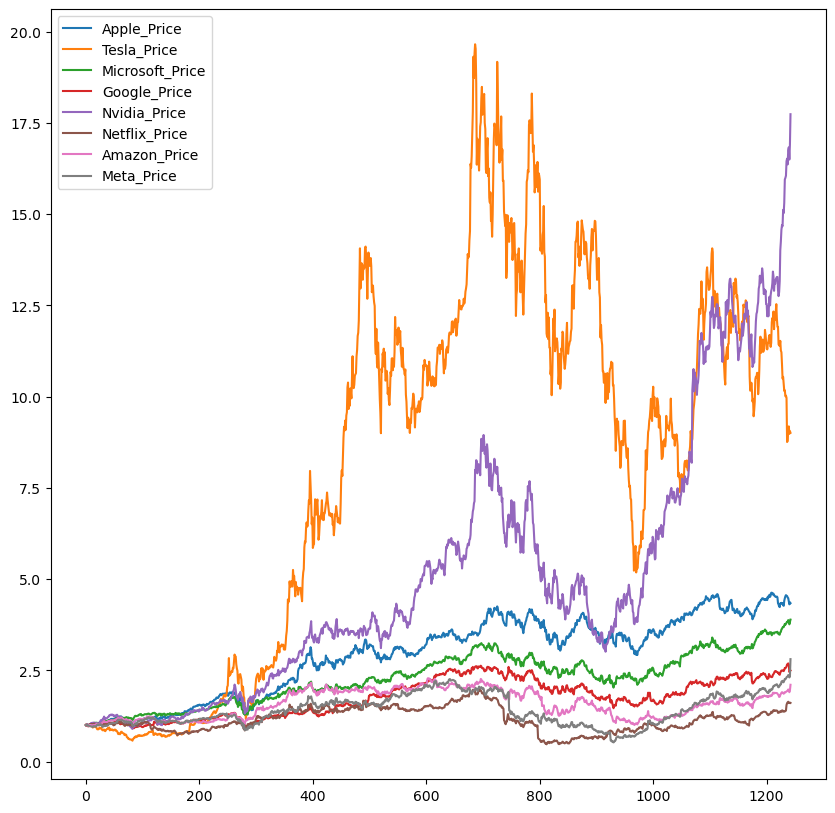

In [97]:
df_price_new.plot(figsize=(10,10))

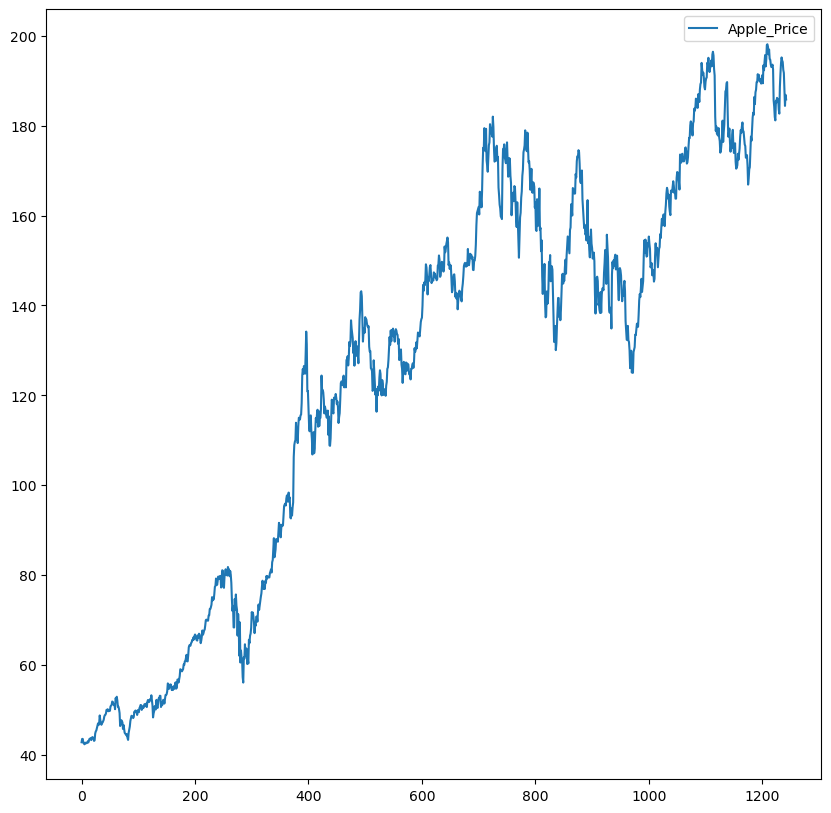

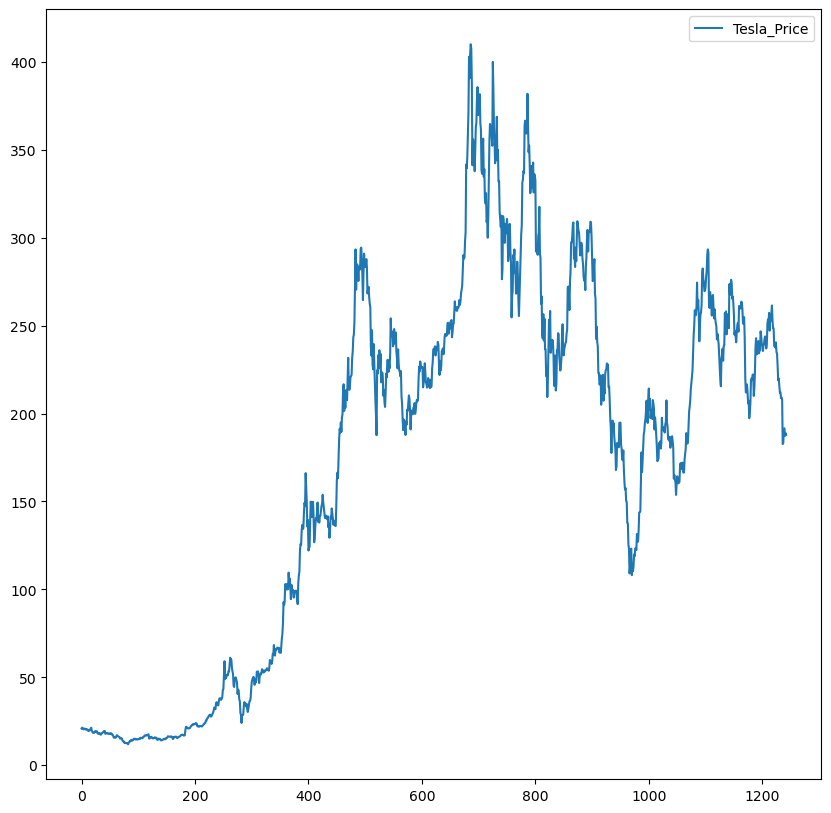

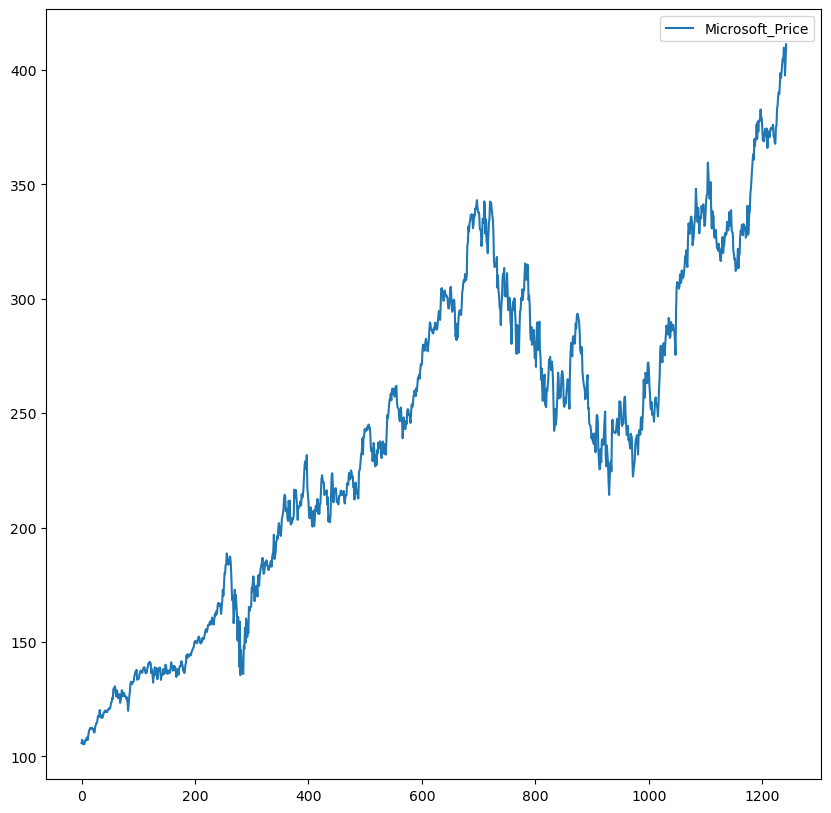

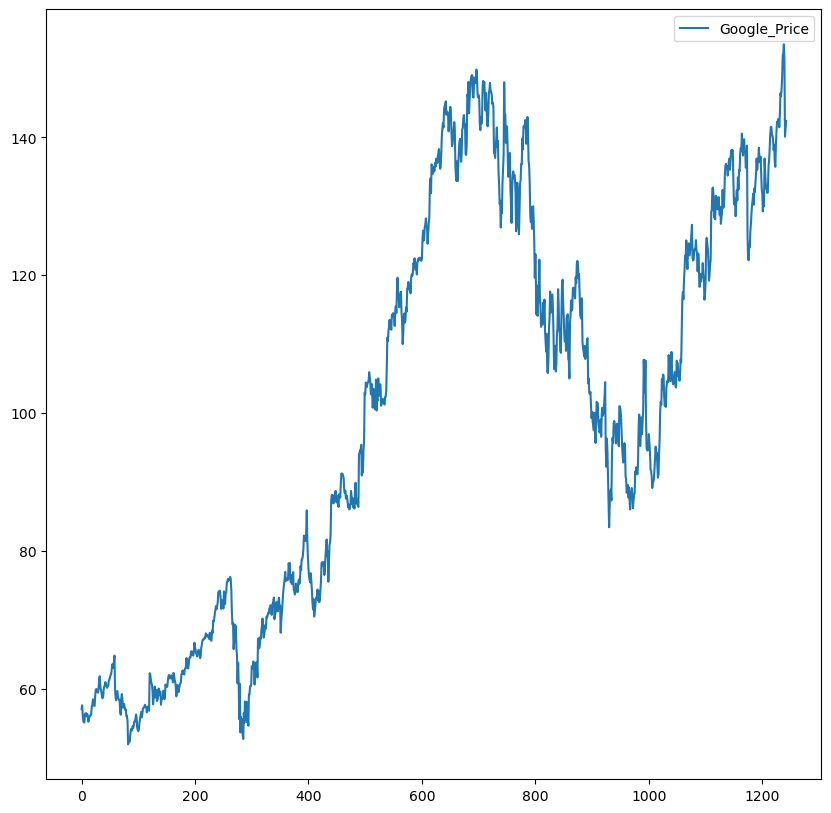

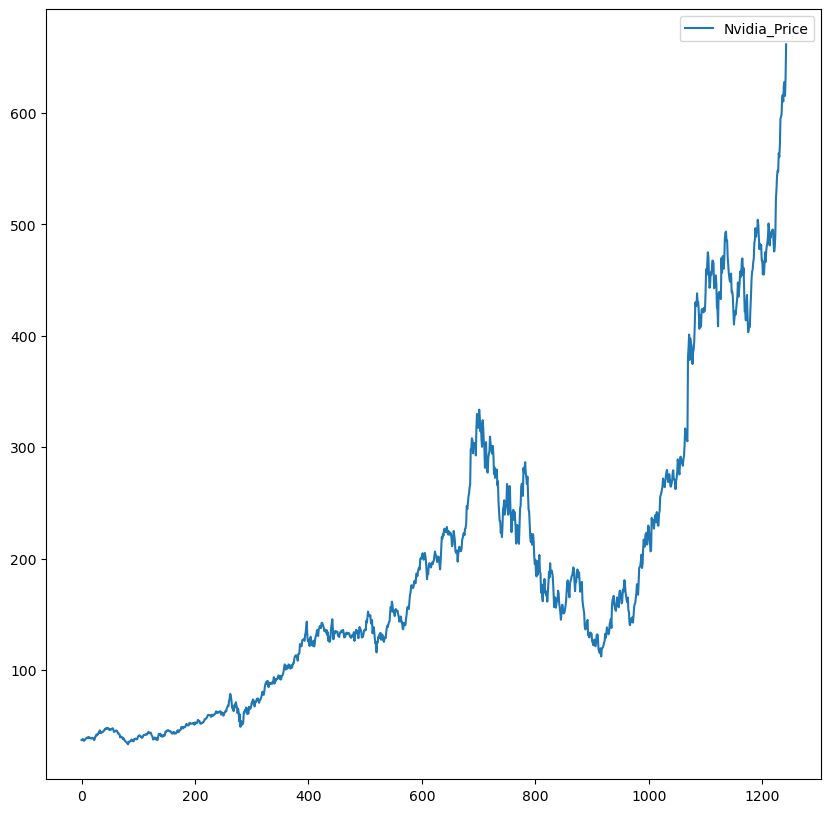

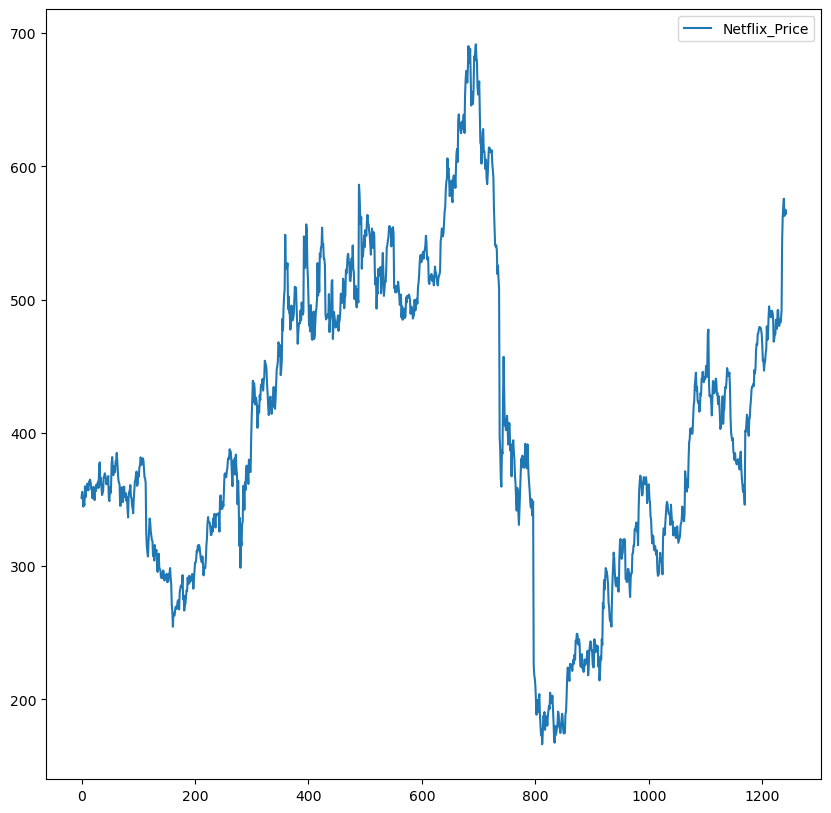

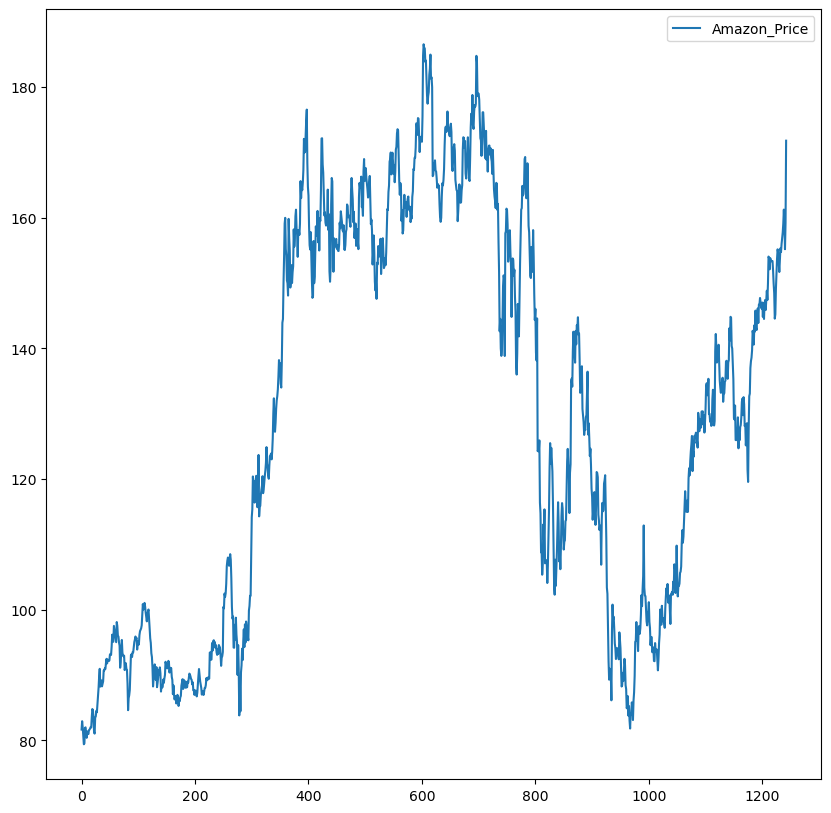

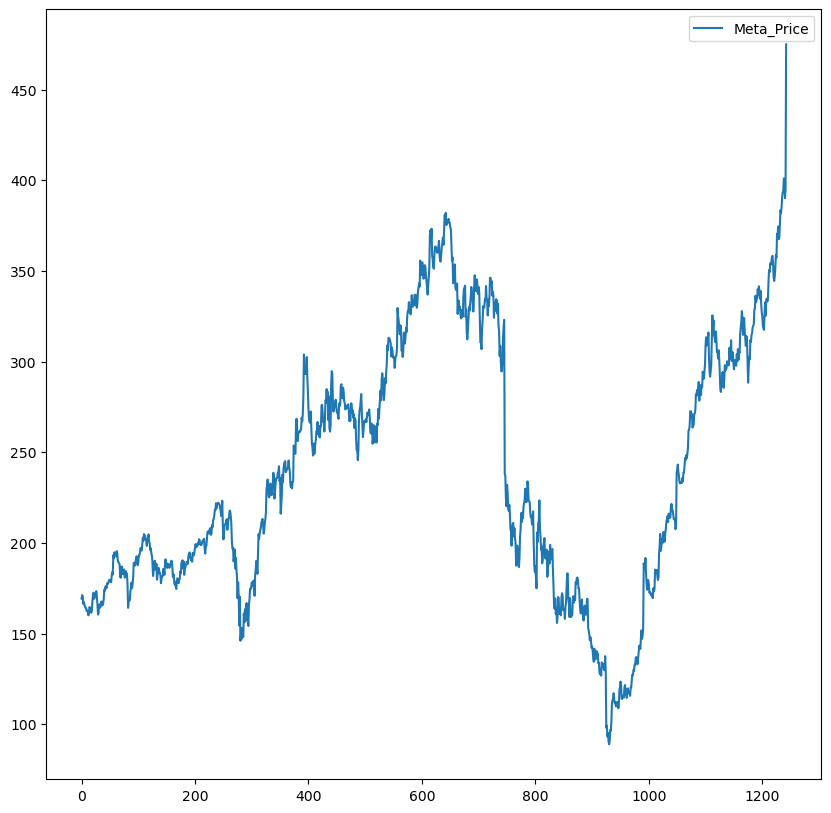

In [98]:
for i in price :
    df.plot(y=[i],figsize=(10,10))

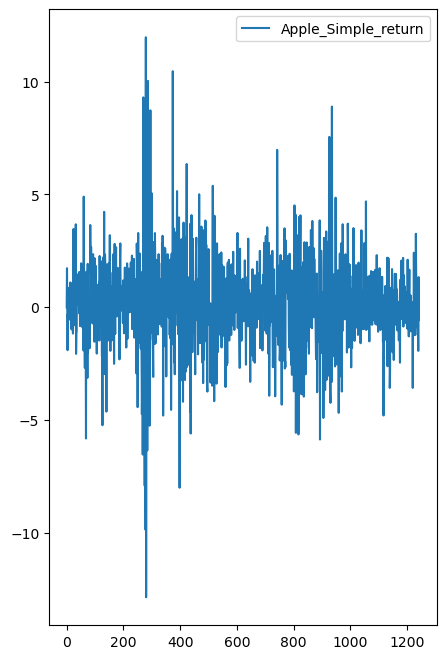

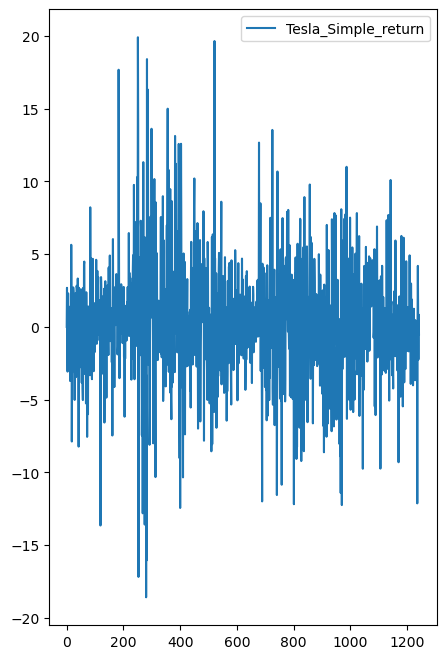

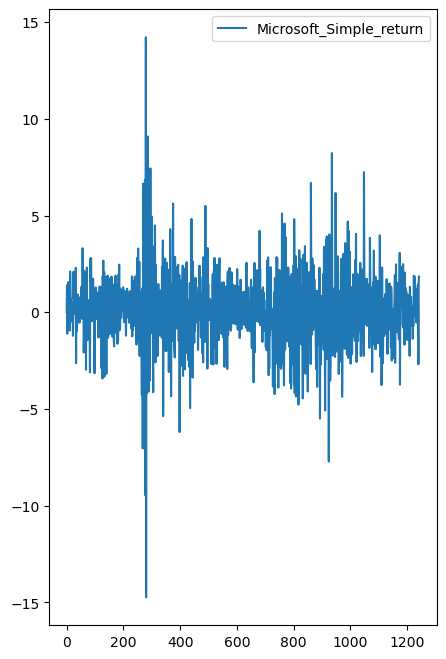

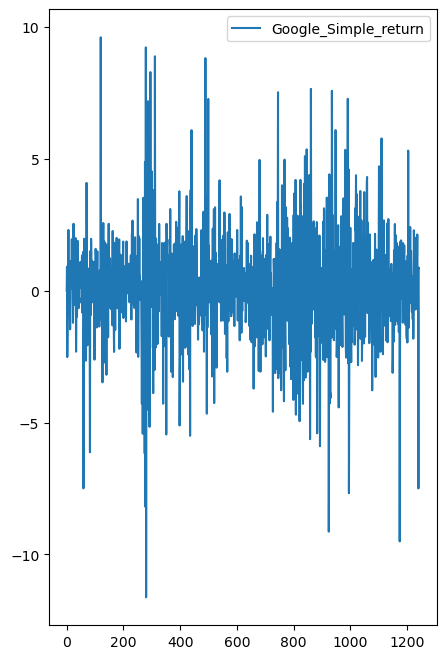

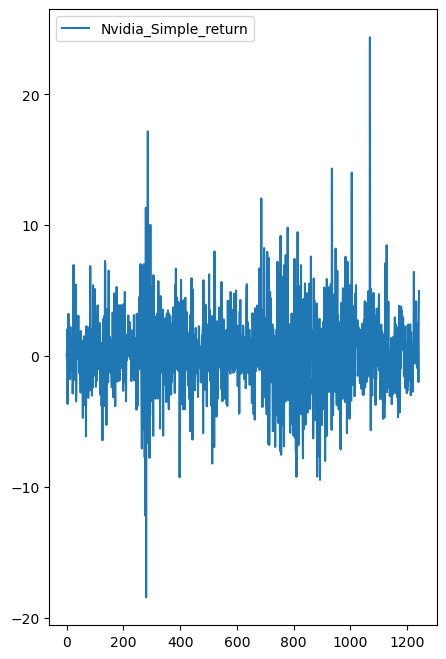

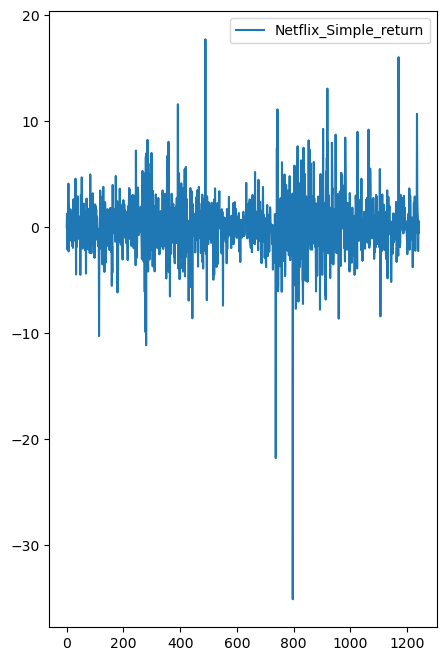

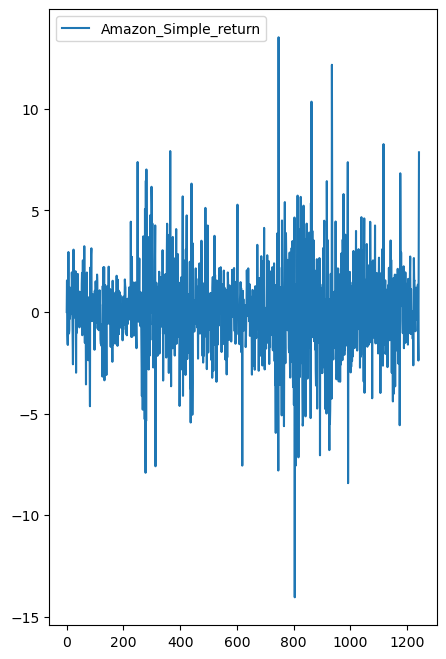

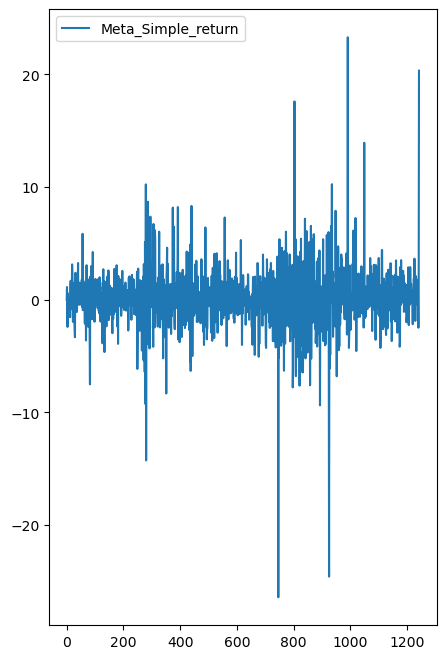

In [99]:
for i in simple_return :
    df.plot(y=[i],figsize=(5,8))

In [100]:
mean_simple_return_day = 0
mean_simple_return_year = 0
mean_simple_return_array_day = []
mean_simple_return_array_year = []
for i in simple_return :
    mean_simple_return_day = df[i].mean()
    mean_simple_return_year=mean_simple_return_day*365
    print(f"Tỷ suất sinh lời trung bình theo ngày {mean_simple_return_day} of {i}")
    mean_simple_return_array_day.append(mean_simple_return_day)
    print(f"Tỷ suất sinh lời trung bình theo năm {mean_simple_return_year} of {i}")
    mean_simple_return_array_year.append(mean_simple_return_year)
    
    

Tỷ suất sinh lời trung bình theo ngày 0.13823618092149215 of Apple_Simple_return
Tỷ suất sinh lời trung bình theo năm 50.45620603634463 of Apple_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.2591230575590836 of Tesla_Simple_return
Tỷ suất sinh lời trung bình theo năm 94.57991600906551 of Tesla_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.1275492021161236 of Microsoft_Simple_return
Tỷ suất sinh lời trung bình theo năm 46.555458772385116 of Microsoft_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.09396996196284878 of Google_Simple_return
Tỷ suất sinh lời trung bình theo năm 34.2990361164398 of Google_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.28324358692417834 of Nvidia_Simple_return
Tỷ suất sinh lời trung bình theo năm 103.38390922732509 of Nvidia_Simple_return
Tỷ suất sinh lời trung bình theo ngày 0.0819694472340644 of Netflix_Simple_return
Tỷ suất sinh lời trung bình theo năm 29.918848240433505 of Netflix_Simple_return
Tỷ suất sinh lời trung bình the

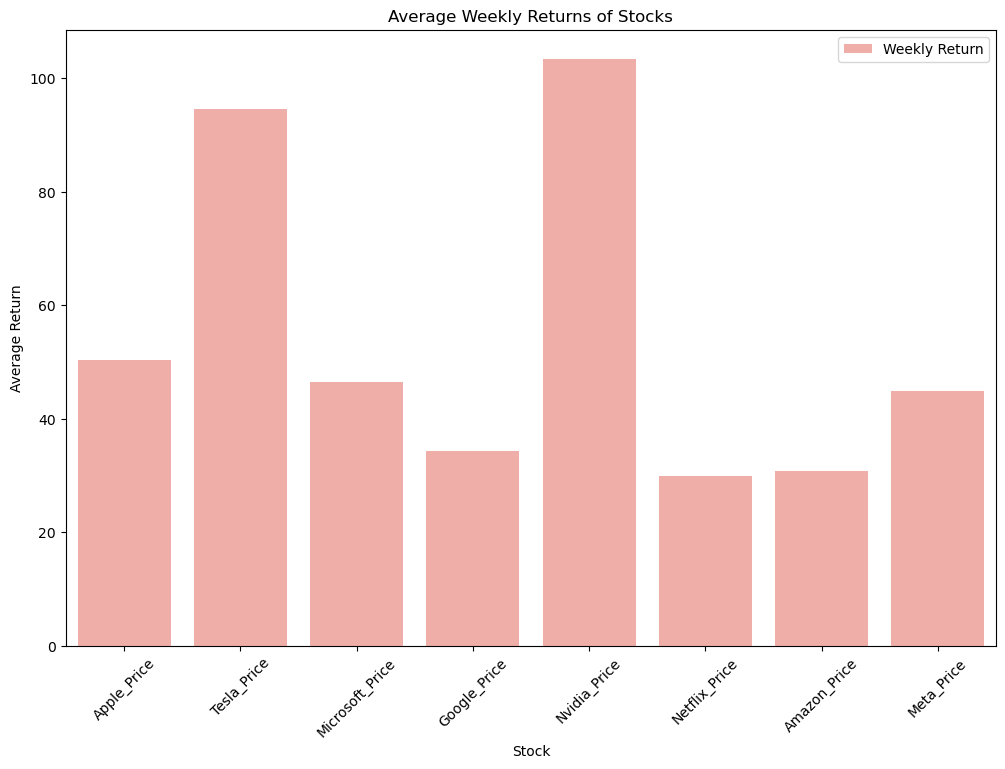

In [101]:

data_visual = pd.DataFrame({'Stock': price, 'Daily_Return': mean_simple_return_array_day, 'Weekly_Return': mean_simple_return_array_year})

plt.figure(figsize=(12, 8))
sns.barplot(x='Stock', y='Weekly_Return', data=data_visual, color='salmon', alpha=0.7, label='Weekly Return')
plt.xticks(rotation=45)
plt.xlabel('Stock')
plt.ylabel('Average Return')
plt.title('Average Weekly Returns of Stocks')
plt.legend()
plt.show()